# Tutorial 1. Electronic structure calculations with Libra: Extended Huckel Theory

In this tutorial, we will learn:

- how to setup and run extended Huckel theory (EHT) calculations with Libra
- how to generate .cube files from the EHT calculations
- how to visualize orbitals using py3Dmol
- how to compute pDOS from the EHT calculations

First, import all the necessary libraries:
* liblibra_core - for general data types from Libra
* libra_py - for the normal modes module
* py3Dmol - for visualization

The output of the cell below will throw a bunch of warnings, but this is not a problem nothing really serios. So just disregard them.

In [1]:
import os
import math
import sys
import py3Dmol

import numpy as np

# Fisrt, we add the location of the library to test to the PYTHON path
if sys.platform=="cygwin":
    from cyglibra_core import *
elif sys.platform=="linux" or sys.platform=="linux2":
    from liblibra_core import *
from libra_py import *

/home/alexey/miniconda2/envs/py37/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/alexey/miniconda2/envs/py37/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, false> > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/alexey/miniconda2/envs/py37/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::vector<float, std::all

Also, lets import matplotlib for plotting and define all the plotting parameters: sizes, colors, etc.

In [2]:
import matplotlib.pyplot as plt   # plots

plt.rc('axes', titlesize=38)      # fontsize of the axes title
plt.rc('axes', labelsize=38)      # fontsize of the x and y labels
plt.rc('legend', fontsize=38)     # legend fontsize
plt.rc('xtick', labelsize=38)    # fontsize of the tick labels
plt.rc('ytick', labelsize=38)    # fontsize of the tick labels

plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)

colors = {}

colors.update({"11": "#8b1a0e"})  # red       
colors.update({"12": "#FF4500"})  # orangered 
colors.update({"13": "#B22222"})  # firebrick 
colors.update({"14": "#DC143C"})  # crimson   

colors.update({"21": "#5e9c36"})  # green
colors.update({"22": "#006400"})  # darkgreen  
colors.update({"23": "#228B22"})  # forestgreen
colors.update({"24": "#808000"})  # olive      

colors.update({"31": "#8A2BE2"})  # blueviolet
colors.update({"32": "#00008B"})  # darkblue  

colors.update({"41": "#2F4F4F"})  # darkslategray

clrs_index = ["11", "21", "31", "41", "12", "22", "32", "13","23", "14", "24"]

Load a Universe - it contains the properties of all elements. The third argument (set to 0) in the *Load_PT* function disables the verbose output

In [3]:
#========= STEP 1:  Create Universe and populate it ================
U = Universe(); LoadPT.Load_PT(U, os.getcwd()+"/elements.dat", verbose=0)

Just for convenience of changing the system we want to look at, lets define a list of possible options. Each option is a dictionary containing information about the input file, its format and the name of the output directory

In [4]:
possible_systems = [  
    {"input_file":"azulene.pdb", "input_format":"iqmol_pdb", "out_prefix":"_res_azulene"},
    {"input_file":"benzene.pdb", "input_format":"pdb_1", "out_prefix":"_res_benzene"},
    {"input_file":"c.pdb", "input_format":"pdb_1", "out_prefix":"_res_carbon_atom"},
    {"input_file":"c2.pdb", "input_format":"pdb_1", "out_prefix":"_res_carbon_dimer"},
    {"input_file":"ch4.pdb", "input_format":"pdb_1", "out_prefix":"_res_ch4"},
    {"input_file":"QD_6_h.xyz", "input_format":"xyz", "out_prefix":"_res_QD_6_h"},
    {"input_file":"QD_7_h.xyz", "input_format":"xyz", "out_prefix":"_res_QD_7_h"},
    {"input_file":"QD_8_h.xyz", "input_format":"xyz", "out_prefix":"_res_QD_8_h"},
    {"input_file":"QD_9_h.xyz", "input_format":"xyz", "out_prefix":"_res_QD_9_h"},
    {"input_file":"QD_10_h.xyz", "input_format":"xyz", "out_prefix":"_res_QD_10_h"},    
    {"input_file":"QD_12_h.xyz", "input_format":"xyz", "out_prefix":"_res_QD_12_h"},    
]

Create a chemiscal system - an object of the `System` type. This object essentially represents a molecule and has the members to store coordinates of all atoms, their masses, etc. It also has methods and data to compute/store the information about topology/connectivity of this system.

Using the `Load_Molecule` function of the `LoadMolecule` module, we can read in the input files with the molecules of selection. This function would need the name of the file and the expected format of its data. There are several formats that can be undersood by this function. Importantly, one can add more formats using regular expressions to define the patterns to recognize these formats and decipheer them.

You can choose one of the systems in our database of examples by simply changing a sinle number, in the line 4.

You can print out some information about the chemical system, using the members of this data type. For instance, the number of atoms is stored in the `Number_of_atoms` variable. 

You can also print out the coordinates of the system (in Angstrom) in the xyz format by using the `get_xyz` function. 

In [5]:
#=========== STEP 2:  Create system and load a molecule ================
syst = System()

my_system = possible_systems[1]

input_file = os.path.join(os.getcwd(), "molecules", my_system["input_file"] )
input_format = my_system["input_format"]
print(F"Reading the molecular file {input_file}")

LoadMolecule.Load_Molecule(U, syst, input_file, input_format)

print("Number of atoms in the system = ", syst.Number_of_atoms)
atlst1 = range(0,syst.Number_of_atoms)
print( syst.get_xyz(0, "abc", 0))

Reading the molecular file /mnt/c/cygwin/home/Alexey-user/compchem-cybertraining/Tutorials_Libra/Tutorials_5_Electronic_Structure/1_EHT/molecules/benzene.pdb
26
Number of atoms in the system =  12
12
Molecule frame= 0 
C -0.231 0.996 0
C 1.164 0.996 0
C 1.861 2.204 0
C 1.164 3.413 -0.001
C -0.231 3.413 -0.002
C -0.929 2.204 -0.001
H -0.781 0.044 0
H 1.713 0.044 0.001
H 2.961 2.204 0.001
H 1.714 4.365 -0.001
H -0.781 4.365 -0.003
H -2.028 2.205 -0.001



We can create an object of the `listHamiltonianQM` type, which essentially sets up all the variables for possible electronic structure calculations. The constructor of this data type takes the name of the file with some control parameters (this is a bit old-fashioned and we'll try to change that in future) and the *syst* object of the `System` type, which contains all the structural information. 

The input file specifies the type of electronic structure (including the type of EHT) calculations to perform, the convergence and other parameters, as well as points to another file - the one containing atomic parameters to compute the Hamiltonian matrix elements.

Finally, the electronic structure calculations are executed by calling the `compute_scf` function. The total electronic energy of the system (in Ha units) is printed out as a result.

In [6]:
#=========== STEP 3: Compute electronic structure ================
lstHamQM = listHamiltonian_QM("control_parameters_eht.dat", syst)
lstHamQM.compute_scf(syst)

-18.629380774730596

Now, as the calculations have been completed, the `lstHamQM` structure contains a lot of useful information about the system.

For instace, we can obtain an electronic structure object via `get_electronic_structure` function. The returned object then contains a lot of other useful information, such as MO-LCAO coefficients, Fock and core Hamiltonian matrices, as well as some descriptive properties. Here are some examples:

- `Nelec` - the number of electrons in the system
- `Norb` - the number of AOs and MOs in the system. This is determined by the basis used. 

In [7]:
el_str = lstHamQM.get_electronic_structure()

print(F"The number of electrons = {el_str.Nelec}")
print(F"The number of orbitals = {el_str.Norb}")

print("Bands(alp)    Occupations(alp)       Bands(bet)    Occupations(bet)")
for j in range(el_str.Norb):
    print("%12.8f   %12.8f  %12.8f   %12.8f" %(el_str.get_bands_alp(j), el_str.get_occ_alp(j), el_str.get_bands_bet(j), el_str.get_occ_bet(j) ) )


The number of electrons = 30.0
The number of orbitals = 30
Bands(alp)    Occupations(alp)       Bands(bet)    Occupations(bet)
 -0.99251106     1.00000000   -0.99251106     1.00000000
 -0.87110811     1.00000000   -0.87110811     1.00000000
 -0.87102555     1.00000000   -0.87102555     1.00000000
 -0.70111912     1.00000000   -0.70111912     1.00000000
 -0.70110489     1.00000000   -0.70110489     1.00000000
 -0.61330136     1.00000000   -0.61330136     1.00000000
 -0.60850406     1.00000000   -0.60850406     1.00000000
 -0.54252037     1.00000000   -0.54252037     1.00000000
 -0.53340592     1.00000000   -0.53340592     1.00000000
 -0.53333190     1.00000000   -0.53333190     1.00000000
 -0.50056505     1.00000000   -0.50056505     1.00000000
 -0.46330568     1.00000000   -0.46330568     1.00000000
 -0.46324071     1.00000000   -0.46324071     1.00000000
 -0.45983645     1.00000000   -0.45983645     1.00000000
 -0.45981014     1.00000000   -0.45981014     1.00000000
 -0.24064397     0

Compute the charge density for HOMO and LUMO

In [8]:
res_prefix = my_system["out_prefix"]

#=========== STEP 4: Compute charge density for HOMO and LUMO ================
# Compute homo index
homo = el_str.Nocc_alp - 1   # index of the HOMO orbital
print(F"Index of the HOMO is {homo}")


prms = Control_Parameters()
prms.orbs = Py2Cpp_int([homo-2, homo-1, homo, homo+1, homo+2, homo+3]) 
prms.nx_grid, prms.ny_grid, prms.nz_grid = 30, 30, 30
chardens_prefix = os.path.join(os.getcwd(), res_prefix, "char_dens")
prms.charge_density_prefix = os.path.join(chardens_prefix, "")

if(os.path.exists(chardens_prefix)==False):
    os.makedirs(chardens_prefix)
    
charge_density( el_str, syst, lstHamQM.basis_ao, prms)

Index of the HOMO is 14


In [9]:
def libra_pdos(_emin, _emax, _de, projections, prefix, outfile, Nel, do_convolve, _de_new, _var):
    """
    
    Args:
    
        * _emin ( double ): minimal energy of the spectrum [eV]
        
        * _emax ( double ): maximal energy of the spectrum [eV]
        
        * _de ( double ): original energy grid spacing  [eV]
        
        * projections ( list ):  groups of atoms and types of projections 
            e.g. projections = [["s",[1,2,3]], ["p",[1,2,3]], ... 
            
            Possible projections (examples)
            proj = [["s",range(0,360)],["p",range(0,360)],["d",range(0,360)]]
            proj = [["s",range(0,1)],["p",range(0,1)],["d",range(0,1)]]
            proj = [["tot",range(0,112)]]

            
        * prefix ( string ): the common prefix of the files containing the projection information
        
        * outfile ( string ): the name of the file that will contain the computed pDOSs
        
        * Nel ( int ): the number of electrons, to compute the Fermi energy
            
        * _de_new ( double ): new energy grid (for convolved) spacing  [eV]
        
        * _var ( double ): the width of the Gaussian used to broaden each energy grid point [eV] 
        
        



# Example of call - for Si QD
# Si
#main(-35.0, 35.0, 0.1,[["tot",range(0,103)]],"_alpha_wfc_atom","dos_proj.txt",238)   

    """
    
    # Internally, we work in a.u. (Ha)
    emin = _emin * units.ev2Ha
    emax = _emax * units.ev2Ha
    de = _de * units.ev2Ha
    de_new = _de_new * units.ev2Ha
    var = _var * units.ev2Ha

    # Determine dimensionality and prepare arrays
    nproj = len(projections)                # number of projections
    N = int(math.floor((emax - emin)/de))+1 # number of the gridpoints

    en0 = []
    dosa = MATRIX(N, nproj)  # Matrix for alpha spin-orbitals dos.get(i,proj) - dos for level i projected on projection proj
    dosb = MATRIX(N, nproj)  # Matrix for beta  spin-orbitals
    
    
    for proj in projections:  # loop over all projection
        ang_mom = proj[0]
        atoms = proj[1]

        proj_indx = projections.index(proj)
                                            
        for a in atoms: # open files for all atoms in given group
            fa = open(prefix+str(a),"r")
            B = fa.readlines()
            fa.close()

            for lin in B[1:-4]:  # read all lines
                tmp = lin.split()
                 
                e = float(tmp[0]) # energy in Ha
                if a==0:
                    en0.append(e)  
                
                x = 0.0
                if ang_mom=="s":
                    x = float(tmp[2])
                elif ang_mom=="p":
                    x = float(tmp[3])
                elif ang_mom=="d":
                    x = float(tmp[4])
                elif ang_mom=="tot":
                    x = float(tmp[1])
                else:
                    x = 0.0

                if e<emin or e>emax:
                    pass
                else:
                    grid_indx = int(math.floor((e - emin)/de))  # grid point
                    dosa.add(grid_indx, proj_indx, x)
                    dosb.add(grid_indx, proj_indx, x)


    
    etol = 1e-10
    kT = 0.1 * units.ev2Ha # some reasonable parameters
    Ef = fermi_energy(en0, Nel,2.0, kT, etol)  # Fermi energy in Ha
    

    en = MATRIX(N,1)
    for i in range(0,N):
        en.set(i, 0, emin + i*de - Ef)

    
    E = None                
    if do_convolve==True:
        E, pDOSa = pdos.convolve(en, dosa, de, de_new, var)
        #E, pDOSb = convolve(en0, dosb, de, de_new, var)
    else:
        E = MATRIX(dosa)
            
    # Convert the energy axis back to eV 
    E *= (1.0/units.ev2Ha)

        
    f2 = open(outfile,"w")
    f2.write("Ef = %5.3f eV\n" % (Ef / units.ev2Ha) )
    f2.close()

    
    res = np.zeros( (N, nproj+2), dtype=float)
    
    # Now compute projections
    for i in range(0,N):  # loop energy grid

        res[i, 0] = E.get(i,0) 
        line = str(E.get(i,0))+"   "

        tot = 0.0
        for j in range(0,nproj):
            res[i, j+1] = pDOSa.get(i,j)
            tot = tot + pDOSa.get(i,j)
            line = line + str(pDOSa.get(i,j))+"   "
            
        res[i, nproj+1] = tot
        line = line + str(tot)+"\n"

        f2 = open(outfile,"a")
        f2.write(line)
        f2.close()
    

    return res
    
        

Now, we can also visualize the HOMO. 

You can choose the isovalue of the orbitals to show - the smaller the absolute value of these isovalues, the larger the extent of the orbitals will be.


In [10]:
# Method 1
xyz = syst.get_xyz(0, "abc", 0)

# 
#orbitals = [homo-2, homo-1, homo, homo+1, homo+2, homo+3]
orbitals = [homo, homo+1]
N = len(orbitals)

view = py3Dmol.view(width=400,height=400, linked=False,viewergrid=(N,1))
view.setBackgroundColor('0xeeeeee')

for orb_indx in orbitals:
    i = orbitals.index(orb_indx)
    
    view.addModel(xyz,'xyz',{'vibrate': {'frames':10,'amplitude':1}}, viewer=(i,0))
    view.setStyle({'sphere':{'radius':0.5}, 'colorscheme':'Jmol' }) # uncomment this, to see the VDW rendering of the molecule
    
    res_prefix = my_system["out_prefix"]
    bohr = open(F'{res_prefix}/char_dens/_orbital_{orb_indx}.cube').read()
    view.addVolumetricData(bohr, "cube", {'isoval':  0.01, 'color': "red", 'opacity': 0.75}, viewer=(i,0))
    view.addVolumetricData(bohr, "cube", {'isoval': -0.01, 'color': "blue", 'opacity': 0.75}, viewer=(i,0))

view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Now, lets compute the pDOS. First, we are going to compute the atom-by-atom-resolved pDOS

In [11]:
# Compute DOSs
dos_dir = os.path.join(res_prefix, "dos")
prms.dos_prefix = os.path.join(dos_dir, "")

if(os.path.exists(dos_dir)==False):
    os.makedirs(dos_dir)
    
compute_dos( el_str, syst, lstHamQM.basis_ao, prms, lstHamQM.atom_to_ao_map)

Now, lets compute various types of projections. For this, we are going to use the `libra_pdos` function.

In [12]:
projections = [ ["tot",range(0,syst.Number_of_atoms)],
                ["s",range(0,syst.Number_of_atoms)],
                ["p",range(0,syst.Number_of_atoms)]
              ]

res = libra_pdos(-35.0, 35.0, 0.1, projections,
              os.path.join(prms.dos_prefix, "_alpha_wfc_atom"), 
              os.path.join(prms.dos_prefix, "dos_proj.txt"),
              el_str.Nelec, do_convolve = True, _de_new = 0.1, _var = 0.1)

multiplication factor is =  1
original grid spacing =  0.00367498438131638
new grid spacing =  0.00367498438131638
gaussian variance =  0.00367498438131638


In [13]:
print( res.shape )

(700, 5)


And now, lets print the pDOS

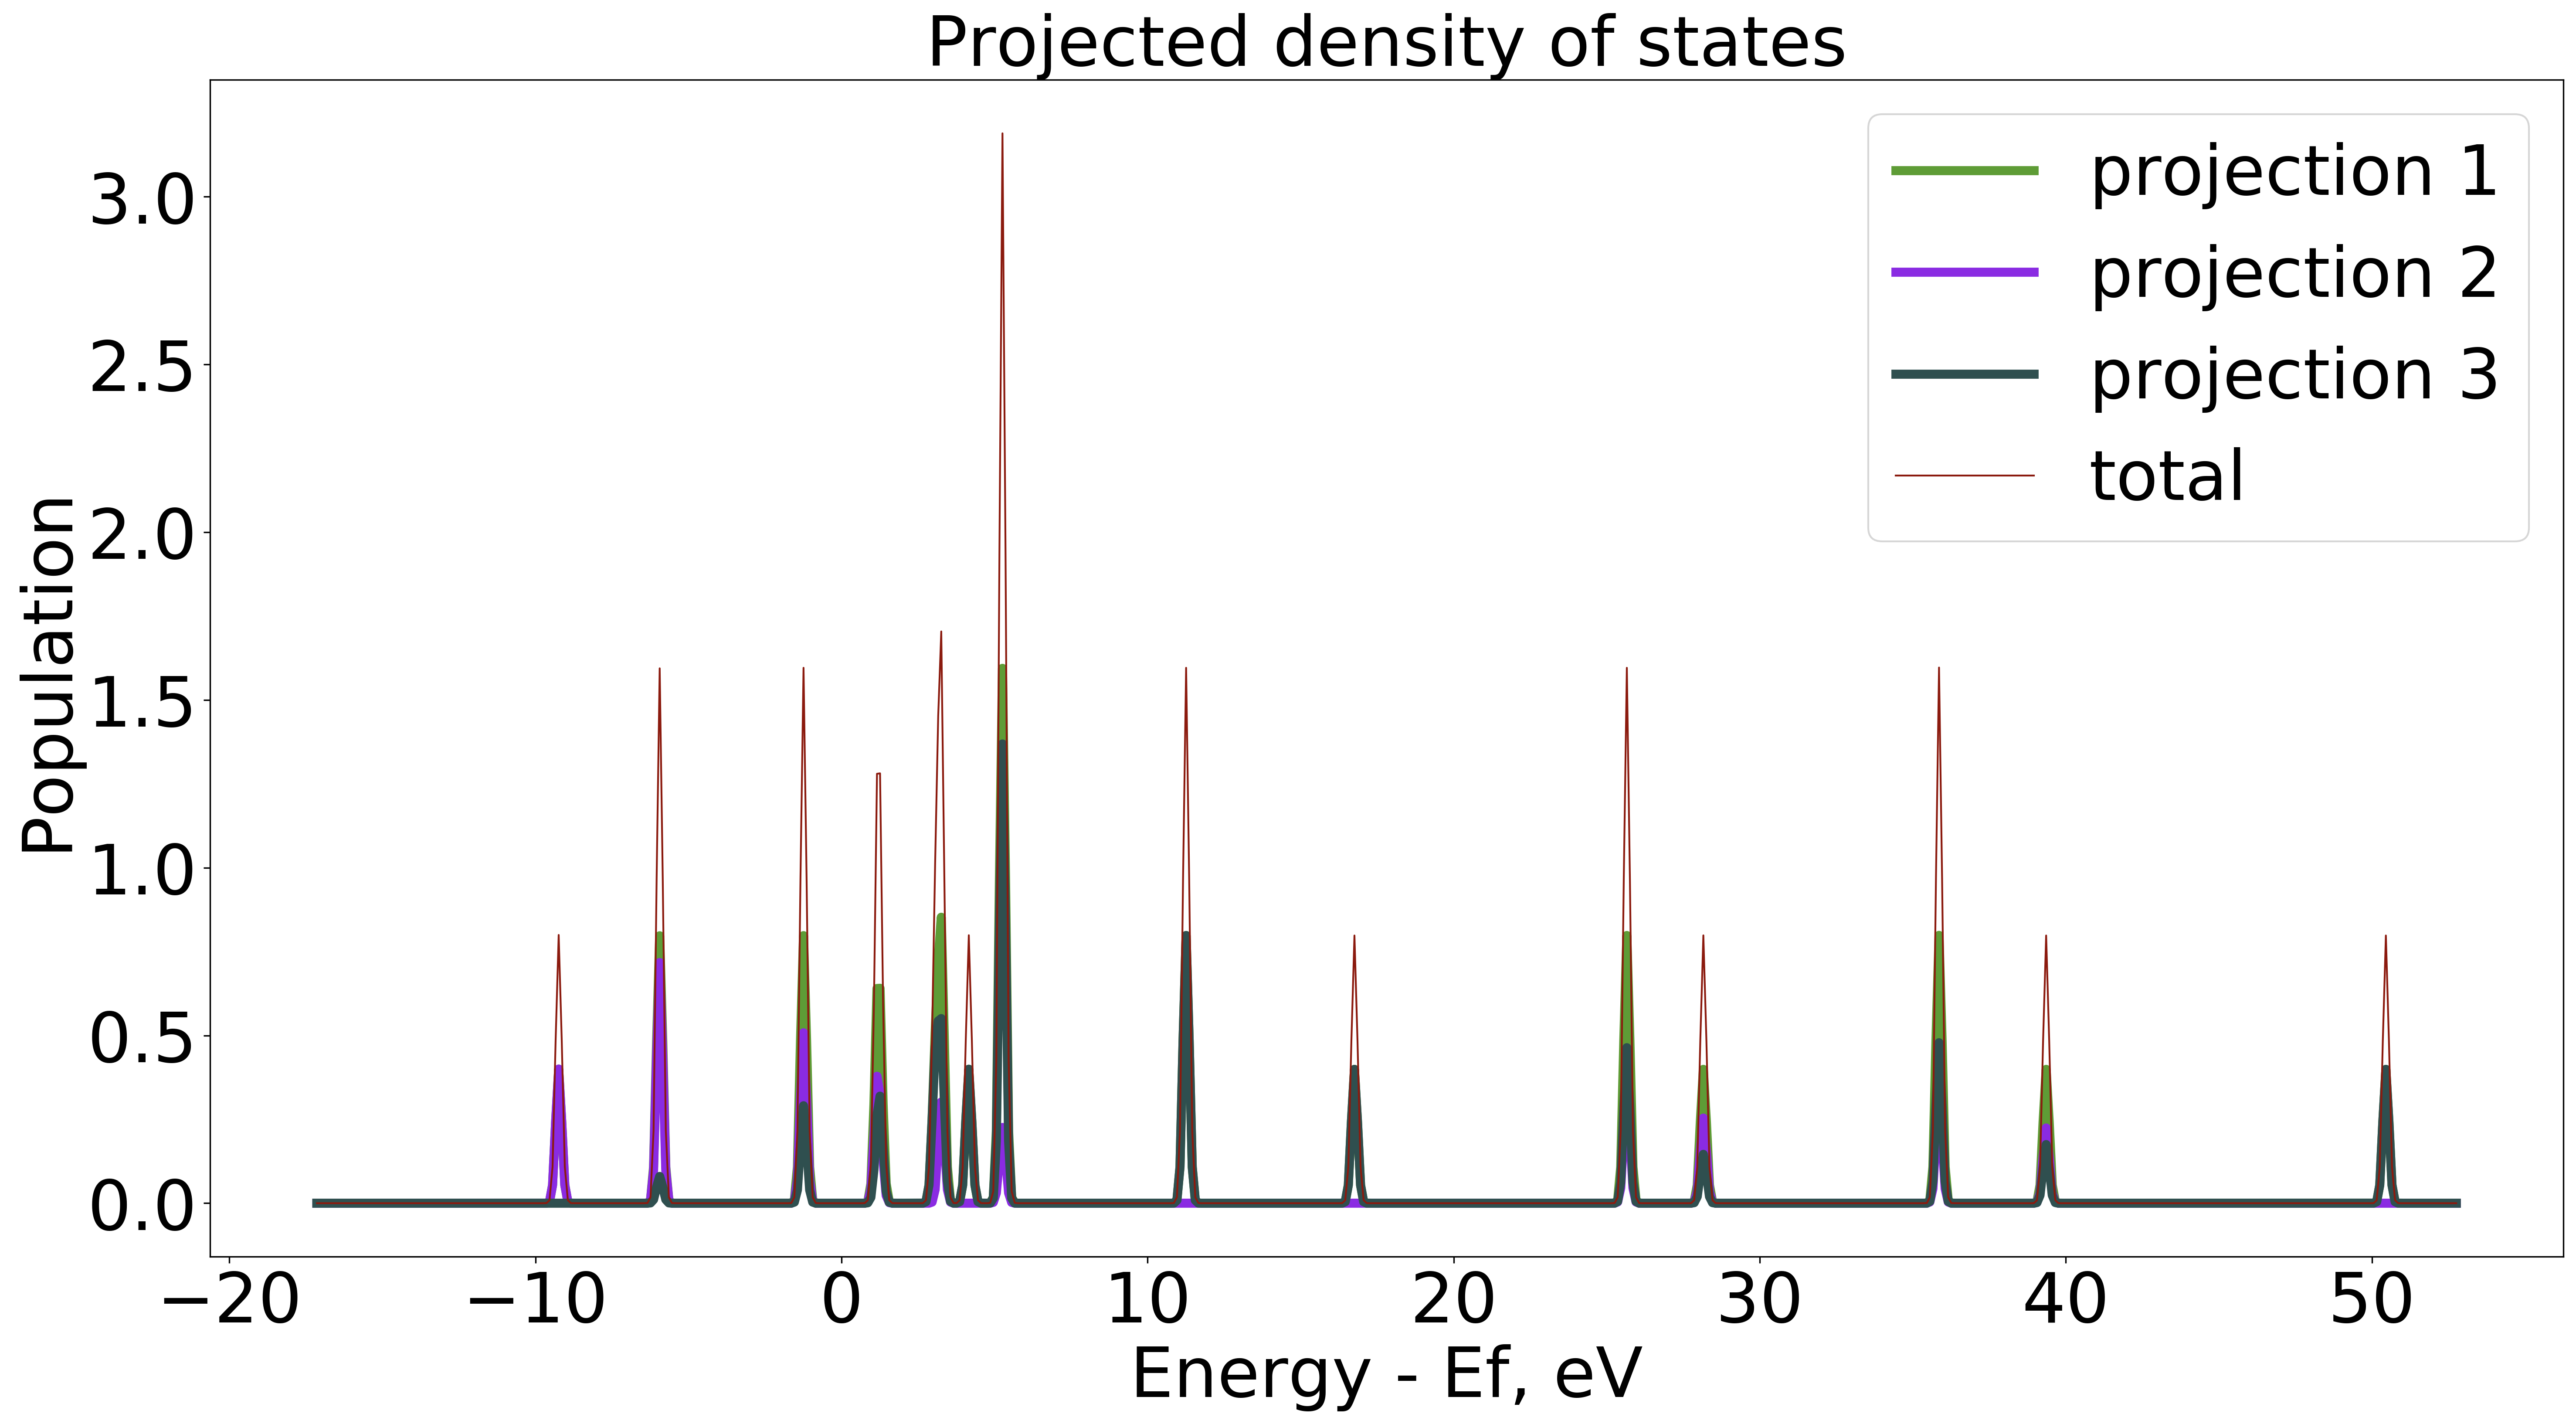

In [14]:
plt.figure(1, figsize=(24, 12), dpi=300, frameon=False)
plt.subplot(1,1,1)
plt.title('Projected density of states')
plt.xlabel('Energy - Ef, eV')
plt.ylabel('Population')
nproj = res.shape[1]-2
for proj in range(1, nproj+1):
    plt.plot(res[:,0], res[:, proj] , label=F'projection {proj}', linewidth=5, color = colors[ clrs_index[proj] ]) 
plt.plot(res[:,0], res[:, nproj+1] , label=F'total', linewidth=1, color = colors["11"]) 

plt.legend()
plt.show()
plt.close()